## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, and build predictive models to identify customers at high risk of churn.

### Business Goal:
Goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


# Following below steps for building model:

### Data Understanding, Preparation, and Pre-Processing :
- Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
- Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
 
### Exploratory Data Analysis :
- Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
- Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
### Feature Engineering and Variable Transformation :
- Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
- Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
### Model Selection, Model Building, and  Prediction :
- Identifying the type of problem and making a list of decisive models from all available choices
- Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
- Testing each model on the respective model evaluation metric
- Choosing the best model based on the fit of the data set and output variable
- Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

<h2 style = "color : Red"> Data Understanding</h2>
Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import numpy as np 


import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Library used to build linear model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df_telecomchurn_train = pd.read_csv("train.csv")
df_telecomchurn_test = pd.read_csv("test.csv")

<h2 style = "color : Red"> Data Exploration</h2>
We will look for 5 top rows using head() function

In [4]:
# Let's take a look at the first five rows of train data
df_telecomchurn_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
# Let's take a look at the first five rows of test data
df_telecomchurn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [6]:
# The shape of the dataset
print(df_telecomchurn_train.shape)
print(df_telecomchurn_test.shape)

(69999, 172)
(30000, 171)


In [7]:
print(df_telecomchurn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


In [8]:
df_telecomchurn_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
for col in df_telecomchurn_train.columns:
    if len(df_telecomchurn_train[col].unique()) == 1:
        print(col)
        df_telecomchurn_train.drop(col,inplace=True,axis=1)
        df_telecomchurn_test.drop(col,inplace=True,axis=1)           

circle_id
last_date_of_month_6


In [10]:
#Identify and calculate the % of missing values in each column
missing_columns = round(100*(df_telecomchurn_train.isnull().sum()/len(df_telecomchurn_train.index)), 2)
missing_columns.loc[missing_columns > 0].sort_values(ascending=False)

max_rech_data_6             74.90
fb_user_6                   74.90
date_of_last_rech_data_6    74.90
av_rech_amt_data_6          74.90
night_pck_user_6            74.90
count_rech_2g_6             74.90
total_rech_data_6           74.90
arpu_2g_6                   74.90
count_rech_3g_6             74.90
arpu_3g_6                   74.90
arpu_3g_7                   74.48
count_rech_2g_7             74.48
av_rech_amt_data_7          74.48
max_rech_data_7             74.48
total_rech_data_7           74.48
arpu_2g_7                   74.48
date_of_last_rech_data_7    74.48
night_pck_user_7            74.48
fb_user_7                   74.48
count_rech_3g_7             74.48
total_rech_data_8           73.69
max_rech_data_8             73.69
date_of_last_rech_data_8    73.69
count_rech_2g_8             73.69
fb_user_8                   73.69
arpu_3g_8                   73.69
count_rech_3g_8             73.69
night_pck_user_8            73.69
av_rech_amt_data_8          73.69
arpu_2g_8     

In [11]:
# All the features which has blank or NA values greater than 70% should be dropped
missing_columns70= missing_columns.loc[missing_columns >70 ].sort_values(ascending=False).index
missing_columns70

Index(['date_of_last_rech_data_6', 'count_rech_2g_6', 'fb_user_6',
       'night_pck_user_6', 'arpu_2g_6', 'arpu_3g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6',
       'arpu_3g_7', 'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7',
       'date_of_last_rech_data_7', 'av_rech_amt_data_7', 'night_pck_user_7',
       'max_rech_data_7', 'total_rech_data_7', 'arpu_2g_7', 'arpu_2g_8',
       'date_of_last_rech_data_8', 'night_pck_user_8', 'max_rech_data_8',
       'arpu_3g_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'count_rech_3g_8', 'count_rech_2g_8', 'fb_user_8'],
      dtype='object')

In [12]:
#Dropping variables having missing data > 70% in Train and test data
for col in missing_columns70:
      df_telecomchurn_train.drop(col,inplace=True,axis=1)
      df_telecomchurn_test.drop(col,inplace=True,axis=1)   

In [13]:
# Finding shape of train and test data
print(df_telecomchurn_train.shape)
print(df_telecomchurn_test.shape)

(69999, 140)
(30000, 139)


In [14]:
#Checking for null values again
missing_columns = round(100*(df_telecomchurn_train.isnull().sum()/len(df_telecomchurn_train.index)), 2)
missing_columns.loc[missing_columns >0].sort_values(ascending=False)

std_og_t2c_mou_8        5.29
loc_og_mou_8            5.29
loc_og_t2m_mou_8        5.29
loc_ic_t2f_mou_8        5.29
loc_og_t2f_mou_8        5.29
loc_ic_t2m_mou_8        5.29
loc_og_t2c_mou_8        5.29
loc_ic_t2t_mou_8        5.29
og_others_8             5.29
loc_og_t2t_mou_8        5.29
std_og_t2t_mou_8        5.29
spl_og_mou_8            5.29
std_og_t2m_mou_8        5.29
isd_og_mou_8            5.29
isd_ic_mou_8            5.29
std_og_t2f_mou_8        5.29
loc_ic_mou_8            5.29
std_og_mou_8            5.29
onnet_mou_8             5.29
roam_og_mou_8           5.29
ic_others_8             5.29
spl_ic_mou_8            5.29
std_ic_t2m_mou_8        5.29
roam_ic_mou_8           5.29
std_ic_mou_8            5.29
std_ic_t2f_mou_8        5.29
offnet_mou_8            5.29
std_ic_t2t_mou_8        5.29
std_ic_t2o_mou_8        5.29
std_ic_t2t_mou_6        3.95
spl_ic_mou_6            3.95
spl_og_mou_6            3.95
std_ic_mou_6            3.95
loc_ic_t2t_mou_6        3.95
og_others_6   

In [15]:
# Search T2 in column list
T2_cols = [k for k in df_telecomchurn_train.columns.to_list() if 't2' in k]
print(T2_cols) 

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [16]:
# Search Date in column list
date_cols = [k for k in df_telecomchurn_train.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [17]:
# summary
print("\n\nSummary statistics\n")
print(df_telecomchurn_train[T2_cols].describe(include='all'))



Summary statistics

       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  loc_og_t2t_mou_6  \
count         69297.0         69297.0         69297.0      67231.000000   
mean              0.0             0.0             0.0         46.904854   
std               0.0             0.0             0.0        150.971758   
min               0.0             0.0             0.0          0.000000   
25%               0.0             0.0             0.0          1.660000   
50%               0.0             0.0             0.0         11.910000   
75%               0.0             0.0             0.0         40.740000   
max               0.0             0.0             0.0       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean          46.166503         45.686109         93.238231         90.799240   
std          154.739002        153.716880        162.046699

In [18]:
#Dropping the variables which has all the statistics as zero

df_telecomchurn_train.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace = True)
df_telecomchurn_test.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace = True)

In [19]:
#Dropping date variables 
df_telecomchurn_train.drop(date_cols,inplace=True,axis=1)
df_telecomchurn_test.drop(date_cols,inplace=True,axis=1)

In [20]:
# Finding shape of train and test data
print(df_telecomchurn_train.shape)
print(df_telecomchurn_test.shape)

(69999, 126)
(30000, 125)


In [21]:
#Checking once againwhat all columns has null values
missing_columns = round(100*(df_telecomchurn_train.isnull().sum()/len(df_telecomchurn_train.index)), 2)
missing_columns.loc[missing_columns>0].sort_values(ascending=False)

ic_others_8         5.29
loc_og_t2m_mou_8    5.29
std_og_mou_8        5.29
spl_og_mou_8        5.29
std_og_t2f_mou_8    5.29
og_others_8         5.29
std_og_t2m_mou_8    5.29
loc_ic_t2t_mou_8    5.29
std_og_t2t_mou_8    5.29
loc_ic_t2m_mou_8    5.29
loc_og_mou_8        5.29
loc_ic_t2f_mou_8    5.29
loc_og_t2c_mou_8    5.29
loc_ic_mou_8        5.29
isd_og_mou_8        5.29
std_ic_t2t_mou_8    5.29
loc_og_t2f_mou_8    5.29
std_ic_t2m_mou_8    5.29
spl_ic_mou_8        5.29
onnet_mou_8         5.29
loc_og_t2t_mou_8    5.29
std_ic_t2f_mou_8    5.29
isd_ic_mou_8        5.29
roam_og_mou_8       5.29
std_ic_mou_8        5.29
offnet_mou_8        5.29
roam_ic_mou_8       5.29
ic_others_6         3.95
og_others_6         3.95
loc_ic_t2t_mou_6    3.95
isd_ic_mou_6        3.95
spl_ic_mou_6        3.95
loc_ic_t2m_mou_6    3.95
std_ic_t2m_mou_6    3.95
loc_ic_t2f_mou_6    3.95
loc_ic_mou_6        3.95
std_ic_mou_6        3.95
std_ic_t2t_mou_6    3.95
std_ic_t2f_mou_6    3.95
spl_og_mou_6        3.95


In [22]:
# Removing churn_probabiltity from the list before imputation
missing_columns= missing_columns.drop('churn_probability')


In [23]:
# imputation of the mising values of zero values in the train and test set

df_telecomchurn_train[missing_columns.index] = df_telecomchurn_train[missing_columns.index].apply(lambda x: x.fillna(0))
df_telecomchurn_test[missing_columns.index] = df_telecomchurn_test[missing_columns.index].apply(lambda x: x.fillna(0))


In [24]:
#Checking what all columns has null values
missing_columns = round(100*(df_telecomchurn_train.isnull().sum()/len(df_telecomchurn_train.index)), 2)
missing_columns.loc[missing_columns>0].sort_values(ascending=False)

Series([], dtype: float64)

In [25]:
# Dropping ID column from both Train as well as Test Data
df_telecomchurn_train.drop(columns = 'id', axis = 1, inplace = True)
df_telecomchurn_test.drop(columns = 'id', axis = 1, inplace = True)

In [26]:
# Finding shape of train and test data
print(df_telecomchurn_train.shape)
print(df_telecomchurn_test.shape)

(69999, 125)
(30000, 124)


<h1 style = "color : Red">Feature Engineering</h1>

Deriving new features

In [27]:
# Create new variable total_arpu: train data
df_telecomchurn_train['total_arpu'] = ( df_telecomchurn_train['arpu_6'] + df_telecomchurn_train['arpu_7'] + df_telecomchurn_train['arpu_8']  ) / 3
# Drop redundant column
df_telecomchurn_train.drop(['arpu_6', 'arpu_7', 'arpu_8'], axis=1, inplace=True)
df_telecomchurn_train.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_arpu
0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,41.937667
1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,55.246667
2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,54.660667
3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0.0,0.0,0

In [28]:
# Create new variable total_arpu: test data
df_telecomchurn_test['total_arpu'] = ( df_telecomchurn_test['arpu_6'] + df_telecomchurn_test['arpu_7'] + df_telecomchurn_test['arpu_8']  ) / 3
# Drop redundant column
df_telecomchurn_test.drop(['arpu_6', 'arpu_7', 'arpu_8'], axis=1, inplace=True)
df_telecomchurn_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,73.885667
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,430.201333
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,503.655667
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,555.69,522.44,549.13,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.0,0.00,3,5,2,110,260,0,110,150,0,110,150,0,0.0,0.0,

In [29]:
# Create new variable total_rech_amount: train data
df_telecomchurn_train['total_rech_amount'] = ( df_telecomchurn_train['total_rech_amt_8'] + df_telecomchurn_train['total_rech_amt_7'] + df_telecomchurn_train['total_rech_amt_6']  )
# Drop redundant column
df_telecomchurn_train.drop(['total_rech_amt_8', 'total_rech_amt_7', 'total_rech_amt_6'], axis=1, inplace=True)
df_telecomchurn_train.head()

# Create new variable total_rech_amount: test data
df_telecomchurn_test['total_rech_amount'] = ( df_telecomchurn_test['total_rech_amt_8'] + df_telecomchurn_test['total_rech_amt_7'] + df_telecomchurn_test['total_rech_amt_6']  )
# Drop redundant column
df_telecomchurn_test.drop(['total_rech_amt_8', 'total_rech_amt_7', 'total_rech_amt_6'], axis=1, inplace=True)
df_telecomchurn_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu,total_rech_amount
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,73.885667,253
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,430.201333,1500
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,503.655667,2500
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,555.69,522.44,549.13,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.0,0.00,3,5,2,110,150,0,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1244,0.00,0.00,0.00,79.78

In [30]:
# Create new variable total_rech_num: train data
df_telecomchurn_train['total_rech_num'] = ( df_telecomchurn_train['total_rech_num_8'] + df_telecomchurn_train['total_rech_num_7'] + df_telecomchurn_train['total_rech_num_6']  )
# Drop redundant column
df_telecomchurn_train.drop(['total_rech_num_8', 'total_rech_num_7', 'total_rech_num_6'], axis=1, inplace=True)
df_telecomchurn_train.head()

# Create new variable total_rech_num: test data
df_telecomchurn_test['total_rech_num'] = ( df_telecomchurn_test['total_rech_num_8'] + df_telecomchurn_test['total_rech_num_7'] + df_telecomchurn_test['total_rech_num_6']  )
# Drop redundant column
df_telecomchurn_test.drop(['total_rech_num_8', 'total_rech_num_7', 'total_rech_num_6'], axis=1, inplace=True)
df_telecomchurn_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu,total_rech_amount,total_rech_num
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,73.885667,253,14
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,430.201333,1500,14
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,503.655667,2500,20
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,555.69,522.44,549.13,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.0,0.00,110,150,0,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1244,0.00,0.00,0.00,79.780000,370,10
4,450.93,609.03,700.68,60.94,23.84,74.1

In [31]:
# Finding shape of train and test data
print(df_telecomchurn_train.shape)
print(df_telecomchurn_test.shape)

(69999, 119)
(30000, 118)


<h1 style = "color : Red">Visualising the Data and performing EDA</h1>


Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

In [32]:
#Let's check the dependent variable i.e Churn Probability

#descriptive statistics summary
df_telecomchurn_train['churn_probability'].describe()

count    69999.000000
mean         0.101887
std          0.302502
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn_probability, dtype: float64

In [33]:
df_telecomchurn_train['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

Skewness: 2.632208


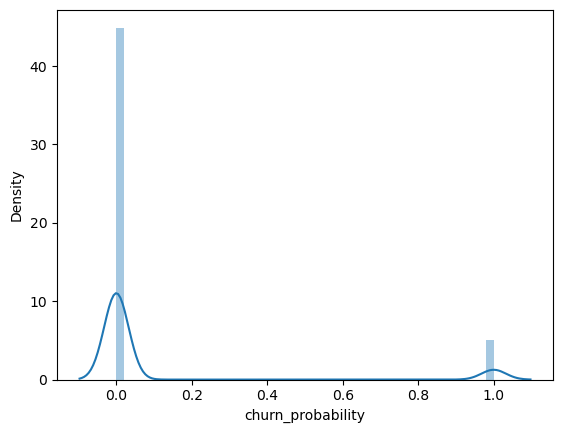

In [34]:
#Let's find out if the target variable is normally distributed??
sns.distplot(df_telecomchurn_train['churn_probability']) 
#skewness
print("Skewness: %f" % df_telecomchurn_train['churn_probability'].skew())

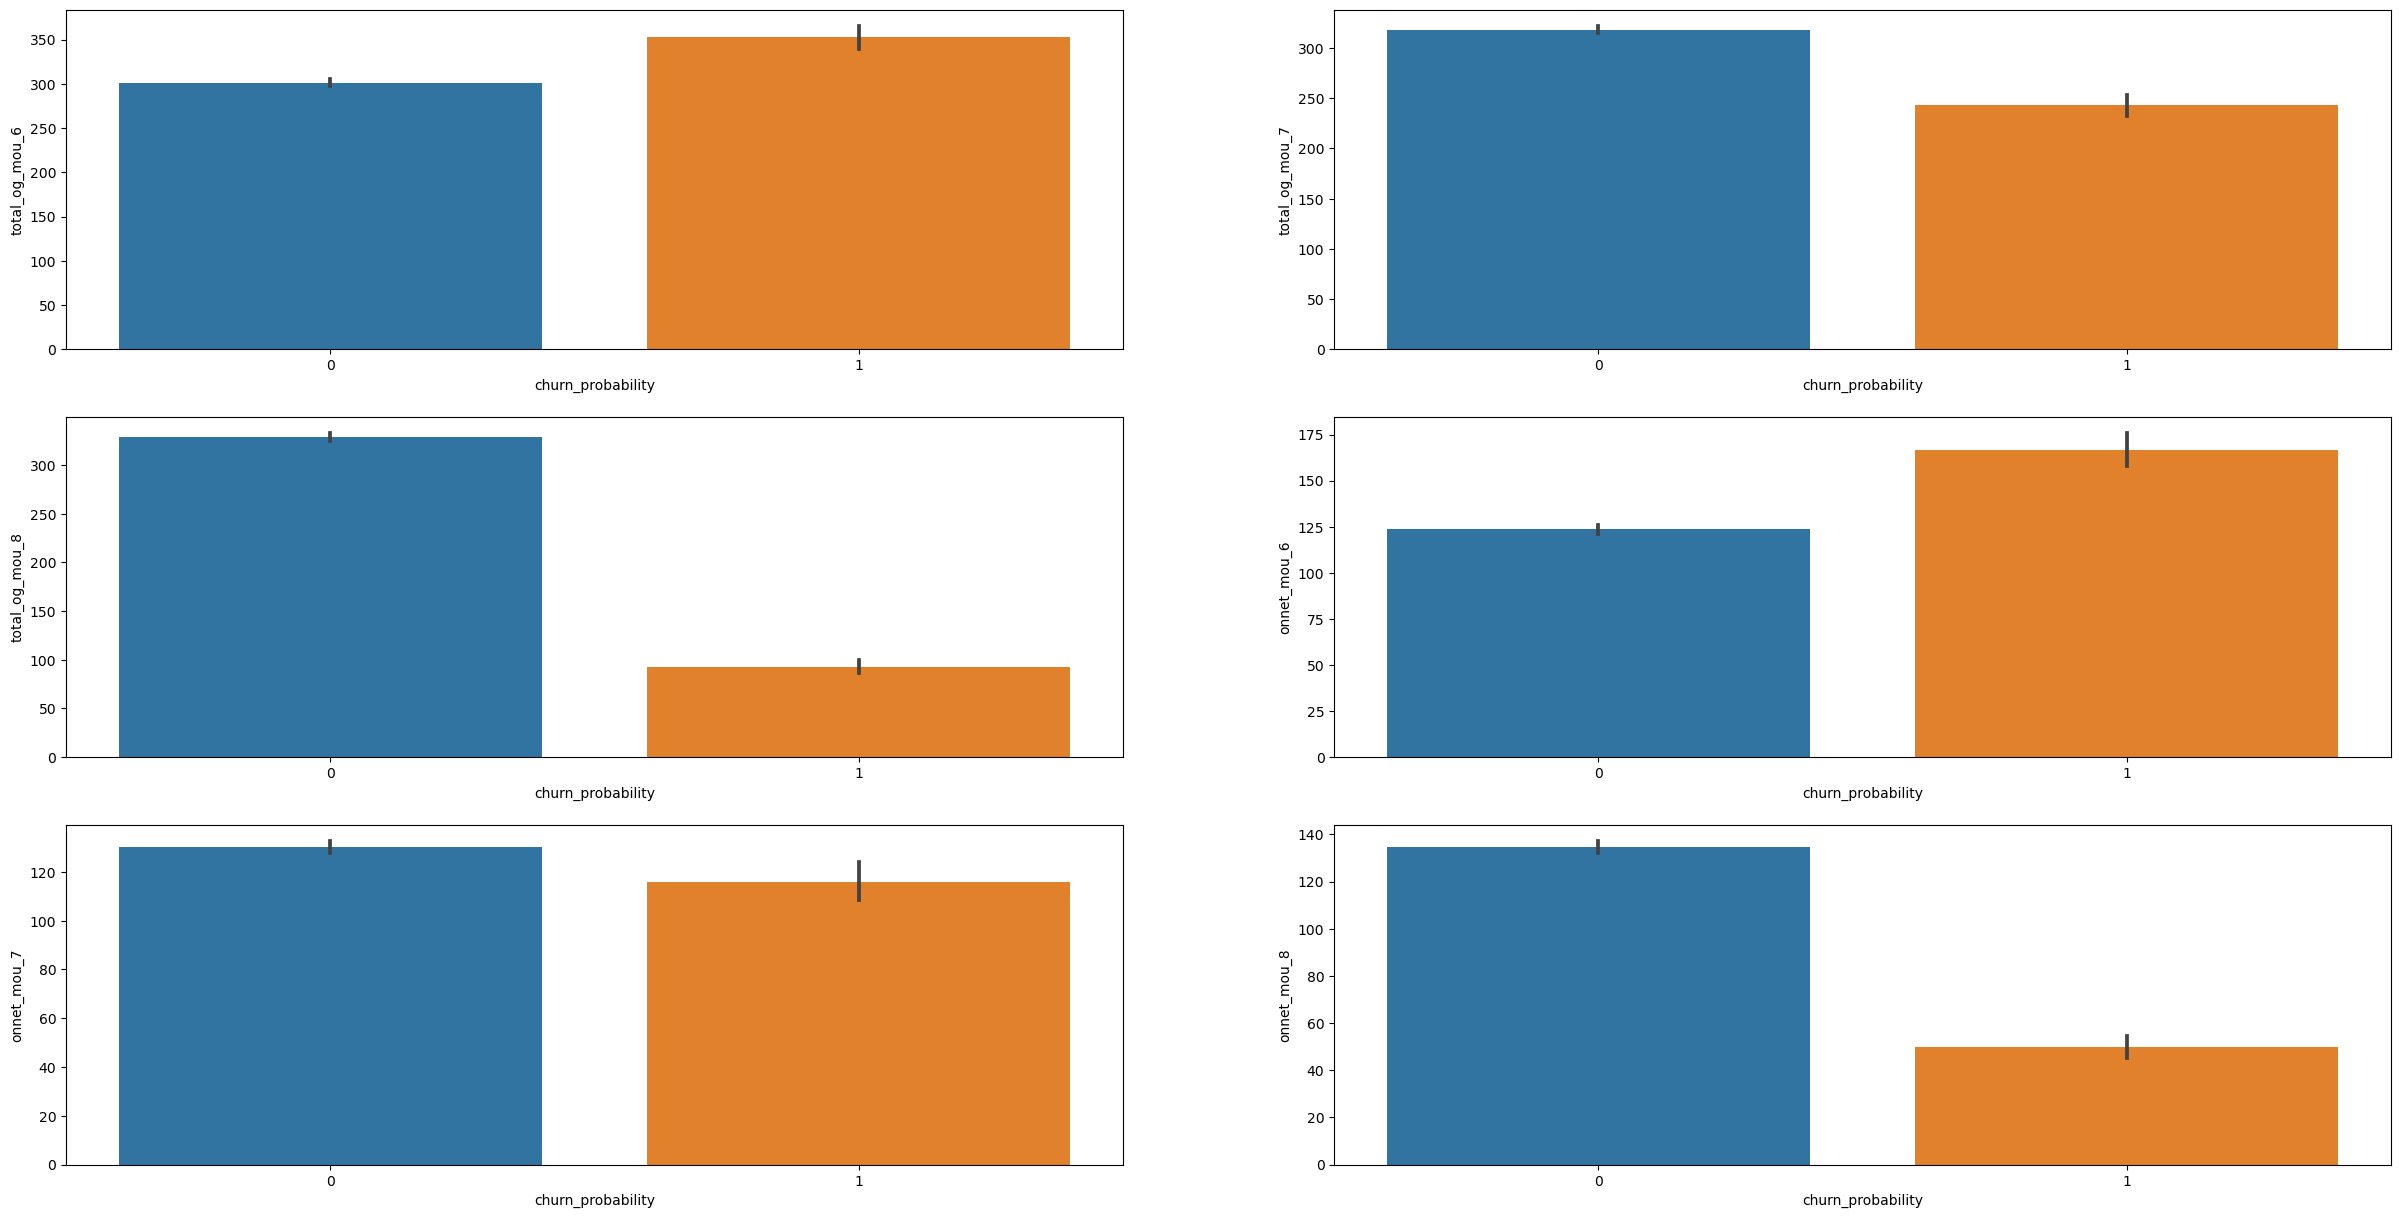

In [35]:
# bar plot of important features with churn_probability.
plt.figure(figsize=(30, 15))
plt.subplot(3,2,1)
sns.barplot(x='churn_probability', y='total_og_mou_6', data=df_telecomchurn_train)
plt.subplot(3,2,2)
sns.barplot(x='churn_probability', y='total_og_mou_7', data=df_telecomchurn_train)
plt.subplot(3,2,3)
sns.barplot(x='churn_probability', y='total_og_mou_8', data=df_telecomchurn_train)
plt.subplot(3,2,4)
sns.barplot(x='churn_probability', y='onnet_mou_6', data=df_telecomchurn_train)
plt.subplot(3,2,5)
sns.barplot(x='churn_probability', y='onnet_mou_7', data=df_telecomchurn_train)
plt.subplot(3,2,6)
sns.barplot(x='churn_probability', y='onnet_mou_8', data=df_telecomchurn_train)
plt.show()

 <h1 style = "color : Red">Univariate EDA</h1>

In [36]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        


count    69999.000000
mean       280.059701
std        310.243414
min         13.426667
25%        105.545833
50%        199.662667
75%        356.245000
max      32140.182000
Name: total_arpu, dtype: float64


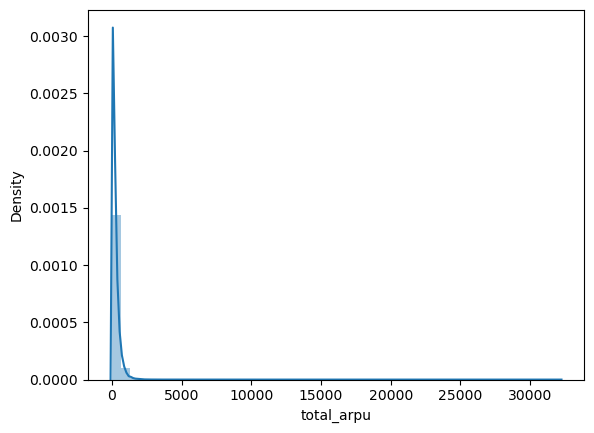

In [37]:
univariate(df_telecomchurn_train.total_arpu)

count    69999.000000
mean        22.498121
std         18.532104
min          0.000000
25%         11.000000
50%         17.000000
75%         28.000000
max        366.000000
Name: total_rech_num, dtype: float64


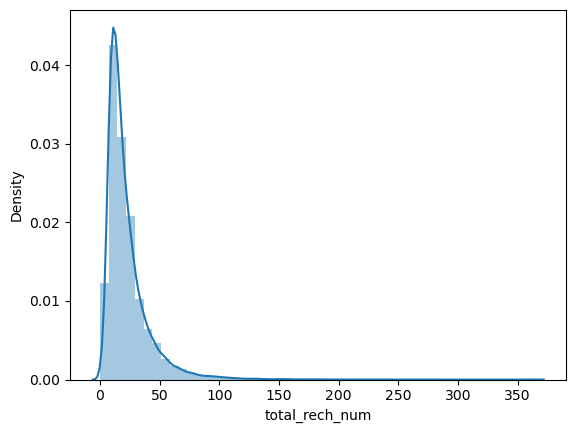

In [38]:
univariate(df_telecomchurn_train.total_rech_num)

count     69999.000000
mean        974.362505
std        1106.099526
min           0.000000
25%         360.000000
50%         692.000000
75%        1244.000000
max      120845.000000
Name: total_rech_amount, dtype: float64


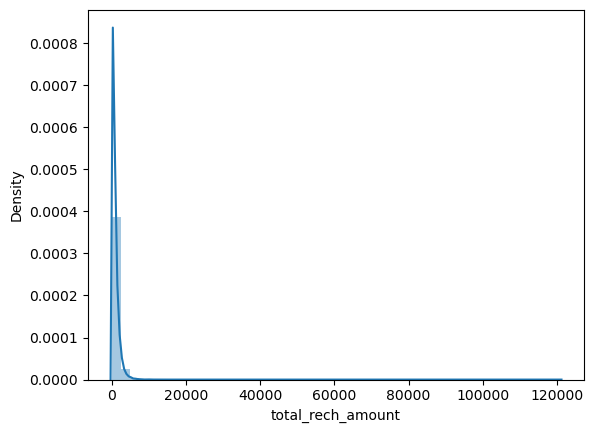

In [39]:
univariate(df_telecomchurn_train.total_rech_amount)

Variables are very **skewed** towards the left.

<h1 style = "color : Red"> Bivariate EDA</h1>


<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

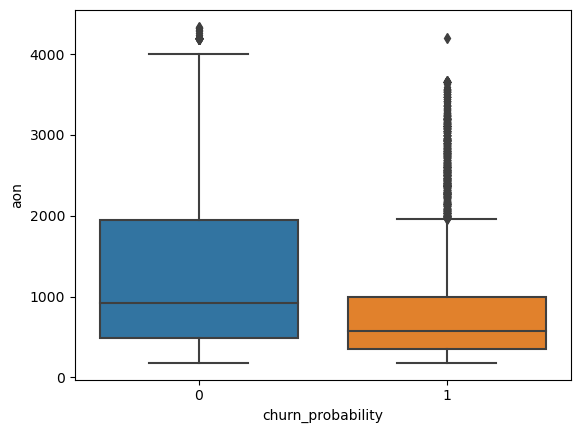

In [40]:
sns.boxplot(df_telecomchurn_train.churn_probability, df_telecomchurn_train.aon)

<AxesSubplot:xlabel='churn_probability', ylabel='total_ic_mou_8'>

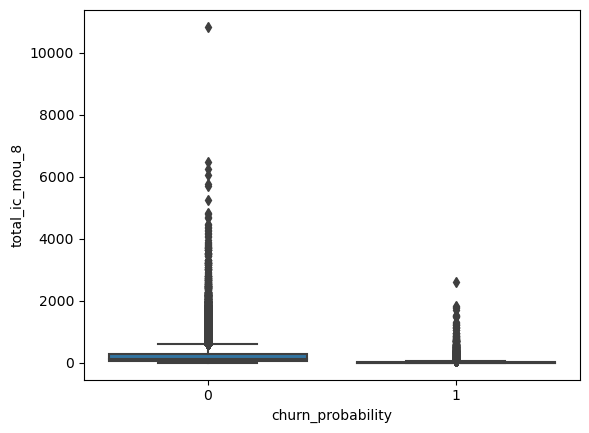

In [41]:
sns.boxplot(df_telecomchurn_train.churn_probability, df_telecomchurn_train.total_ic_mou_8)

<AxesSubplot:xlabel='churn_probability', ylabel='loc_ic_t2m_mou_8'>

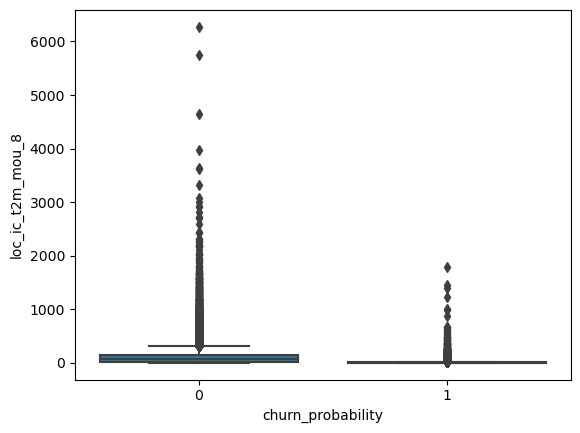

In [42]:
sns.boxplot(df_telecomchurn_train.churn_probability, df_telecomchurn_train.loc_ic_t2m_mou_8)

<AxesSubplot:xlabel='churn_probability', ylabel='total_og_mou_8'>

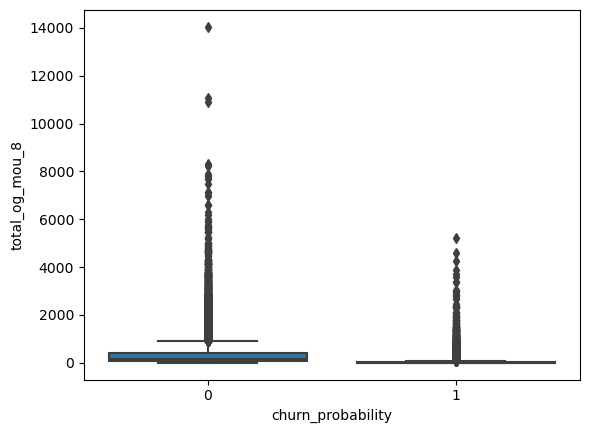

In [43]:
sns.boxplot(df_telecomchurn_train.churn_probability, df_telecomchurn_train.total_og_mou_8)

In [44]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [45]:
#Getting all numerical variables
numericVars = df_telecomchurn_train.select_dtypes(include = np.number).columns.tolist()
numericVars.remove('churn_probability')
numericVars

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 

In [46]:
# cap outliers in the numeric columns
df_telecomchurn_train[numericVars] = df_telecomchurn_train[numericVars].apply(cap_outliers, axis=0)

<h1 style = "color : Red">Modelling</h1>

In [47]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Preprocessing data

### Train Test split

In [48]:
# divide data into train and test
X = df_telecomchurn_train.drop("churn_probability", axis = 1)
y = df_telecomchurn_train.churn_probability


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

<h1 style = "color : Red">PCA</h1>

In [49]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=42))])

In [50]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [51]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       15.17
1       23.99
2       29.64
3       34.47
4       38.11
5       41.18
6       43.93
7       46.53
8       49.01
9       51.30
10      53.55
11      55.75
12      57.68
13      59.52
14      61.25
15      62.83
16      64.19
17      65.49
18      66.73
19      67.97
20      69.14
21      70.23
22      71.31
23      72.37
24      73.36
25      74.30
26      75.23
27      76.14
28      76.95
29      77.72
30      78.48
31      79.21
32      79.93
33      80.64
34      81.30
35      81.94
36      82.57
37      83.19
38      83.77
39      84.34
40      84.91
41      85.45
42      85.98
43      86.48
44      86.96
45      87.43
46      87.89
47      88.35
48      88.80
49      89.24
50      89.66
51      90.06
52      90.46
53      90.85
54      91.24
55      91.60
56      91.95
57      92.30
58      92.64
59      92.98
60      93.29
61      93.58
62      93.86
63      94.14
64      94.42
65      94.68
66      94.95
67      95.21
68      95.47
69      95.72
70      95.96
71    

~ 51 components explain 90% variance

~ 67 components explain 95% variance

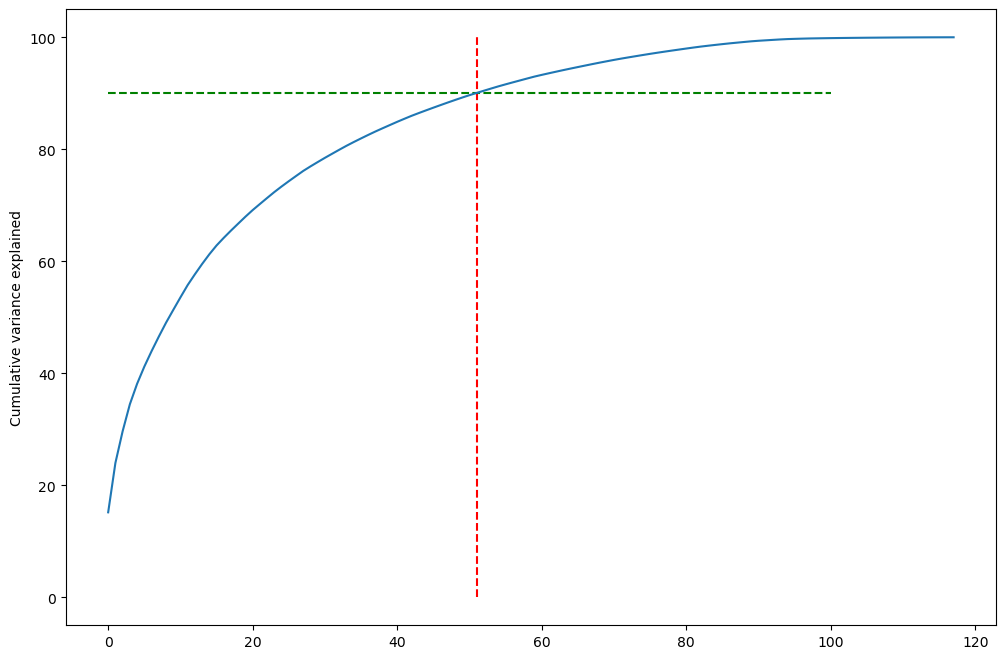

In [52]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
fig = plt.figure(figsize=[12,8])
#43 components explaining 90% variance
plt.vlines(x=51, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(cumulative_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

<h1 style = "color : Red">PCA and Logistic Regression</h1>


### Applying logistic regression on the data on our Principal components


In [53]:
# create pipeline
PCA_VARS = 51
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS,random_state=42)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [54]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7910436389264558

### Evaluate on test data

[[12337  3380]
 [  279  1504]]
Sensitivity: 	0.84
Specificity: 	0.78
AUC:    	 0.89
Train accuracy: 0.79
Test accuracy: 0.79


Text(50.722222222222214, 0.5, 'True')

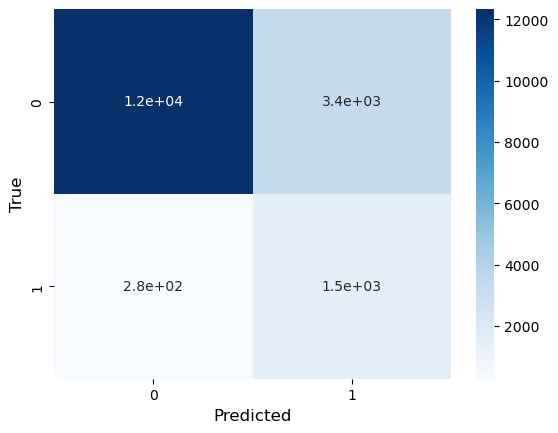

In [55]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# Measure accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 pipeline.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test,  y_pred), 2))

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     15717
           1       0.31      0.84      0.45      1783

    accuracy                           0.79     17500
   macro avg       0.64      0.81      0.66     17500
weighted avg       0.91      0.79      0.83     17500



## Accuracies with PCA and Logistic
### Train accuracy: 0.79
### Test accuracy: 0.79

 <h1 style = "color : Red">Random Forest with Hyperparameter tuning</h1>

In [57]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

# hyperparameter space
params = {
        'n_estimators' : [250],
        'max_depth' : [7], 
        'max_features' : [30],
        'min_samples_split':[3, 4],
        'min_samples_leaf':[1,2],
        "class_weight":['balanced', {0:1,1:10}]
    }


# create 3 folds
folds = StratifiedKFold(n_splits = 3)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

In [58]:
# fit model
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 10}],
                         'max_depth': [7], 'max_features': [30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 4], 'n_estimators': [250]},
             scoring='accuracy', verbose=1)

In [59]:
# print best hyperparameters
print("Best Accuracy: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)
print("Best estimators: ", rf_model.best_estimator_)


Best Accuracy:  0.9223985610062072
Best hyperparameters:  {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
Best estimators:  RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=30,
                       min_samples_split=3, n_estimators=250, oob_score=True,
                       random_state=100)


[[14688  1029]
 [  358  1425]]
Sensitivity: 	0.8
Specificity: 	0.93
AUC:    	 0.94
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     15717
           1       0.58      0.80      0.67      1783

    accuracy                           0.92     17500
   macro avg       0.78      0.87      0.81     17500
weighted avg       0.94      0.92      0.93     17500

Test accuracy: 0.92


Text(50.722222222222214, 0.5, 'True')

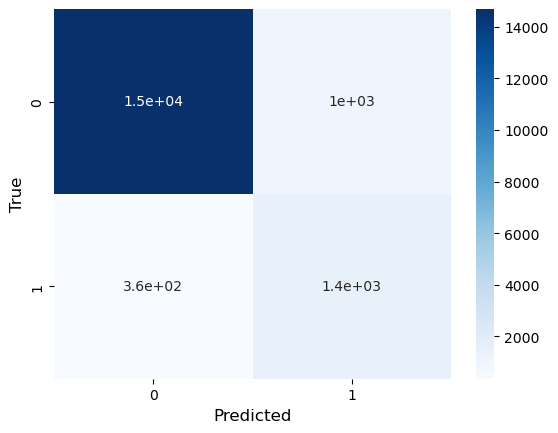

In [60]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))

print("Test accuracy:", np.round(accuracy_score(y_test,  y_pred), 2))

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## Choosing best features from the random forest algorithm

In [61]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model_best = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

11


In [62]:
# fit model
rf_model_best.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   13.8s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [63]:
# predict churn on test data
y_pred = rf_model_best.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model_best.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print("Test accuracy:", np.round(accuracy_score(y_test,  y_pred), 2))


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[[15432   285]
 [  760  1023]]
Sensitivity: 	0.57
Specificity: 	0.98


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


AUC:    	 0.94
Test accuracy: 0.94


### Feature Importance

In [64]:
# predictors
features = df_telecomchurn_train.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model_best.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,7.713693
1,loc_ic_mou_8,6.770276
2,loc_ic_t2m_mou_8,5.898305
3,loc_ic_t2t_mou_8,5.778929
4,total_og_mou_8,4.353762
5,loc_og_t2t_mou_8,3.749125
6,loc_og_t2m_mou_8,3.124893
7,loc_og_mou_8,2.906000
8,roam_og_mou_8,2.865443
9,last_day_rch_amt_8,2.647349



# Using random forest model on complete train and test data

### We would be using random forest alogrithm as it is giving good accuracy


In [65]:
#Create train and test dataframes using actual data
X_train_complete = df_telecomchurn_train.drop('churn_probability', axis=1)
y_train_complete = df_telecomchurn_train['churn_probability']

X_test_complete = df_telecomchurn_test



In [66]:
# fit model
rf_model_best.fit(X_train_complete, y_train_complete)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   20.8s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [67]:
# predict churn on test data
y_pred_complete = rf_model_best.predict(X_test_complete)



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


## Conclusion
- We have used Random Forest as final model to create sample solution as it is giving test accuracy for 94%
- August month's data is very useful in predicting as most of the important features belongs to august month
- We can see various trends in august month like incoming and outgoing calls, last recharge date etc



<h2>Below are the top features</h2>

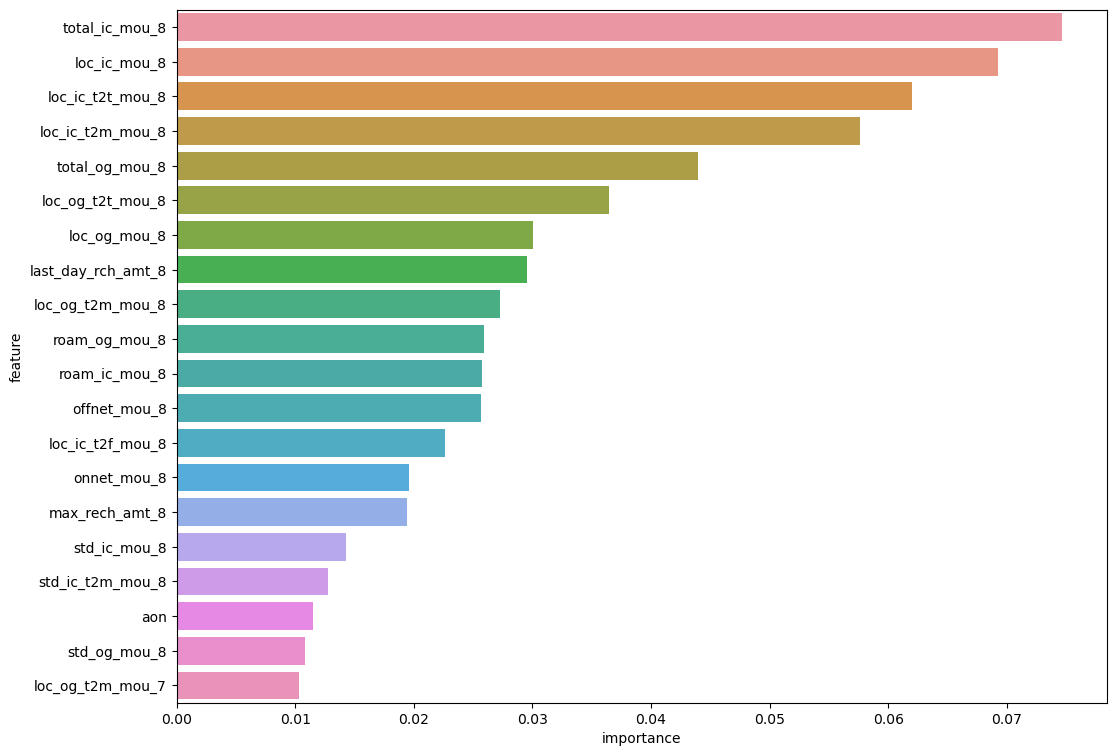

In [68]:
rf_df_telecom_churn = pd.DataFrame({'feature' : df_telecomchurn_train.drop('churn_probability', axis=1).columns, 'importance' : rf_model_best.feature_importances_})
rf_df_telecom_churn = rf_df_telecom_churn.sort_values(by = 'importance', ascending = False).head(20)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = rf_df_telecom_churn, y = 'feature', x = 'importance')
plt.show()

## Creating submission file

In [74]:
solution = pd.read_csv('sample.csv')
solution.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [75]:
solution['churn_probability'] = y_pred_complete

print(solution['churn_probability'].value_counts())

solution.to_csv('solution.csv', index=False)

0    27720
1     2280
Name: churn_probability, dtype: int64
